In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Just to look over rough trend using Fred Data

In [101]:
import datetime as dt

In [85]:
import pandas as pd
from fredapi import Fred 

api_key1 = '1cb86f29ea746886d18ae94e4d72462c'
fred = Fred(api_key1)

In [115]:
series_id = 'MEHOINUSWIA646N'
med_income_WI = pd.DataFrame(fred.get_series(series_id))

In [116]:
med_income_WI.rename(columns={0: 'Mean Income'}, inplace=True)
med_income_WI.reset_index(inplace=True)
med_income_WI.rename(columns={'index': 'Date'}, inplace=True)
med_income_WI['Year'] = med_income_WI['Date'].dt.year

In [121]:
series_id = 'MEHOINUSA646N'
med_income_US = pd.DataFrame(fred.get_series(series_id))

In [264]:
med_income_US

,Date,Mean Income,Year,Date_Ordinal
0,1984-01-01,22420.0,1984,724276
1,1985-01-01,23620.0,1985,724642
2,1986-01-01,24900.0,1986,725007
3,1987-01-01,26060.0,1987,725372
4,1988-01-01,27230.0,1988,725737
5,1989-01-01,28910.0,1989,726103
6,1990-01-01,29940.0,1990,726468
7,1991-01-01,30130.0,1991,726833
8,1992-01-01,30640.0,1992,727198
9,1993-01-01,31240.0,1993,727564


In [122]:
med_income_US.rename(columns={0: 'Mean Income'}, inplace=True)
med_income_US.reset_index(inplace=True)
med_income_US.rename(columns={'index': 'Date'}, inplace=True)
med_income_US['Year'] = med_income_WI['Date'].dt.year

In [126]:
med_income_US[(med_income_US['Year'] >= 2012 & med_income_US['Year'] <= 2024)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Wisconsin:   
0.03577 x - 61.12
Nationwide:   
0.03971 x - 69.07


/var/folders/sh/cp3hzsyj6cx_zsl5rn3l6nhc0000gn/T/ipykernel_60317/1584422510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WI['Log Income'] = np.log(filtered_WI['Mean Income'])
/var/folders/sh/cp3hzsyj6cx_zsl5rn3l6nhc0000gn/T/ipykernel_60317/1584422510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_US['Log Income'] = np.log(filtered_US['Mean Income'])


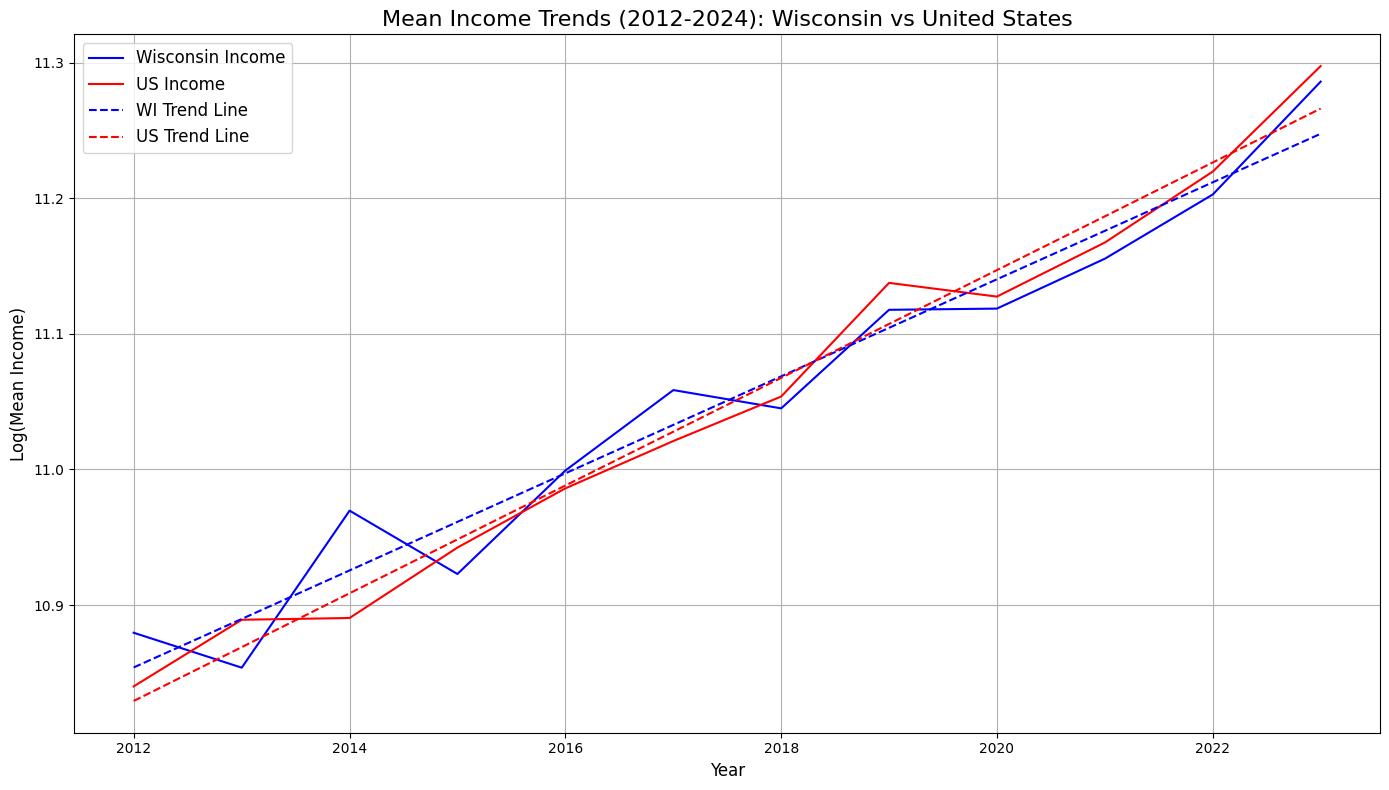

In [196]:
# Filter the data to only include years from 2012 to 2024
filtered_WI = med_income_WI[(med_income_WI['Year'] >= 2012) & (med_income_WI['Year'] <= 2024)]
filtered_US = med_income_US[(med_income_US['Year'] >= 2012) & (med_income_US['Year'] <= 2024)]
filtered_WI['Log Income'] = np.log(filtered_WI['Mean Income'])
filtered_US['Log Income'] = np.log(filtered_US['Mean Income'])

# Fit trend lines for filtered data
z_filtered_wi = np.polyfit(filtered_WI['Year'], filtered_WI['Log Income'], 1)
p_filtered_wi = np.poly1d(z_filtered_wi)
print("Wisconsin: ", p_filtered_wi)

z_filtered_us = np.polyfit(filtered_US['Year'], filtered_US['Log Income'], 1)
p_filtered_us = np.poly1d(z_filtered_us)
print("Nationwide: ", p_filtered_us)
# Plot the filtered data and trend lines
plt.figure(figsize=(14, 8))
plt.plot(filtered_WI['Date'], filtered_WI['Log Income'], label='Wisconsin Income', color='blue')
plt.plot(filtered_US['Date'], filtered_US['Log Income'], label='US Income', color='red')

# Add trend lines for filtered data
plt.plot(
    filtered_WI['Date'], 
    p_filtered_wi(filtered_WI['Year']), 
    linestyle='--', color='blue', label='WI Trend Line'
)
plt.plot(
    filtered_US['Date'], 
    p_filtered_us(filtered_US['Year']), 
    linestyle='--', color='red', label='US Trend Line'
)

# Customize the plot
plt.title('Mean Income Trends (2012-2024): Wisconsin vs United States', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Log(Mean Income)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
series_id = 'MSPUS'
med_house_US = pd.DataFrame(fred.get_series(series_id))
med_house_US.columns = ['median_price']

In [29]:
med_house_US

,median_price
1963-01-01,17800.0
1963-04-01,18000.0
1963-07-01,17900.0
1963-10-01,18500.0
1964-01-01,18500.0
...,...
2023-07-01,435400.0
2023-10-01,423200.0
2024-01-01,426800.0
2024-04-01,414500.0


In [14]:
series_id = 'ATNHPIUS31540Q'
house_WI = fred.get_series(series_id)

In [20]:
house_WI

1976-10-01     33.79
1977-01-01     36.02
1977-04-01     37.50
1977-07-01     39.20
1977-10-01     39.87
               ...  
2023-07-01    326.46
2023-10-01    329.44
2024-01-01    331.04
2024-04-01    347.00
2024-07-01    345.78
Length: 192, dtype: float64

In [4]:
import numpy as np

In [5]:
# Kaggle Data
housePricing = pd.read_csv('house pricing data.csv')

In [206]:
housePricing.columns

Index(['Unnamed: 0', 'period_begin', 'period_end', 'period_duration',
       'region_type', 'region_type_id', 'table_id', 'is_seasonally_adjusted',
       'region', 'city', 'state', 'state_code', 'property_type',
       'property_type_id', 'median_sale_price', 'median_sale_price_mom',
       'median_sale_price_yoy', 'median_list_price', 'median_list_price_mom',
       'median_list_price_yoy', 'median_ppsf', 'median_ppsf_mom',
       'median_ppsf_yoy', 'median_list_ppsf', 'median_list_ppsf_mom',
       'median_list_ppsf_yoy', 'homes_sold', 'homes_sold_mom',
       'homes_sold_yoy', 'pending_sales', 'pending_sales_mom',
       'pending_sales_yoy', 'new_listings', 'new_listings_mom',
       'new_listings_yoy', 'inventory', 'inventory_mom', 'inventory_yoy',
       'months_of_supply', 'months_of_supply_mom', 'months_of_supply_yoy',
       'median_dom', 'median_dom_mom', 'median_dom_yoy', 'avg_sale_to_list',
       'avg_sale_to_list_mom', 'avg_sale_to_list_yoy', 'sold_above_list',
       'so

In [215]:
median_sale = pd.DataFrame(housePricing.groupby('year')['median_sale_price'].mean())

In [216]:
median_sale.reset_index(inplace=True)
median_sale.rename(columns={'index': 'Year'}, inplace=True)


In [219]:
median_sale.rename(columns={'year': 'Year'}, inplace=True)
median_sale['Year']

0     2012
1     2013
2     2014
3     2015
4     2016
5     2017
6     2018
7     2019
8     2020
9     2021
10    2022
11    2023
12    2024
Name: Year, dtype: int32

In [42]:
housePricing['state'] = housePricing['region'].str.split(',').str[1].str.strip()

In [45]:
sorted_ppsf = housePricing.groupby('state')['median_ppsf'].mean().sort_values(ascending=False)

# Display the sorted results
print(sorted_ppsf)

state
HI              517.671975
CA              437.450855
DC              420.735678
MA              292.441805
WY              288.145850
CO              255.360271
NJ              252.628709
DE              249.158103
WA              228.624003
ND              227.618104
NV              221.582176
OR              208.539662
MT              207.363410
RI              205.296494
MD              200.690119
VA              195.818388
CT              195.509896
NY              188.554596
FL              186.592033
UT              182.080975
AK              179.154863
TX              176.927750
ME              175.148845
ID              175.048111
MN              174.715720
NH              169.255426
AZ              169.069772
Ma              159.676674
NM              157.950734
NC              153.254781
IA              151.572752
VT              151.112494
TN              138.145326
SC              136.020703
MO              132.748515
GA              131.797455
MI              131.53

In [51]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


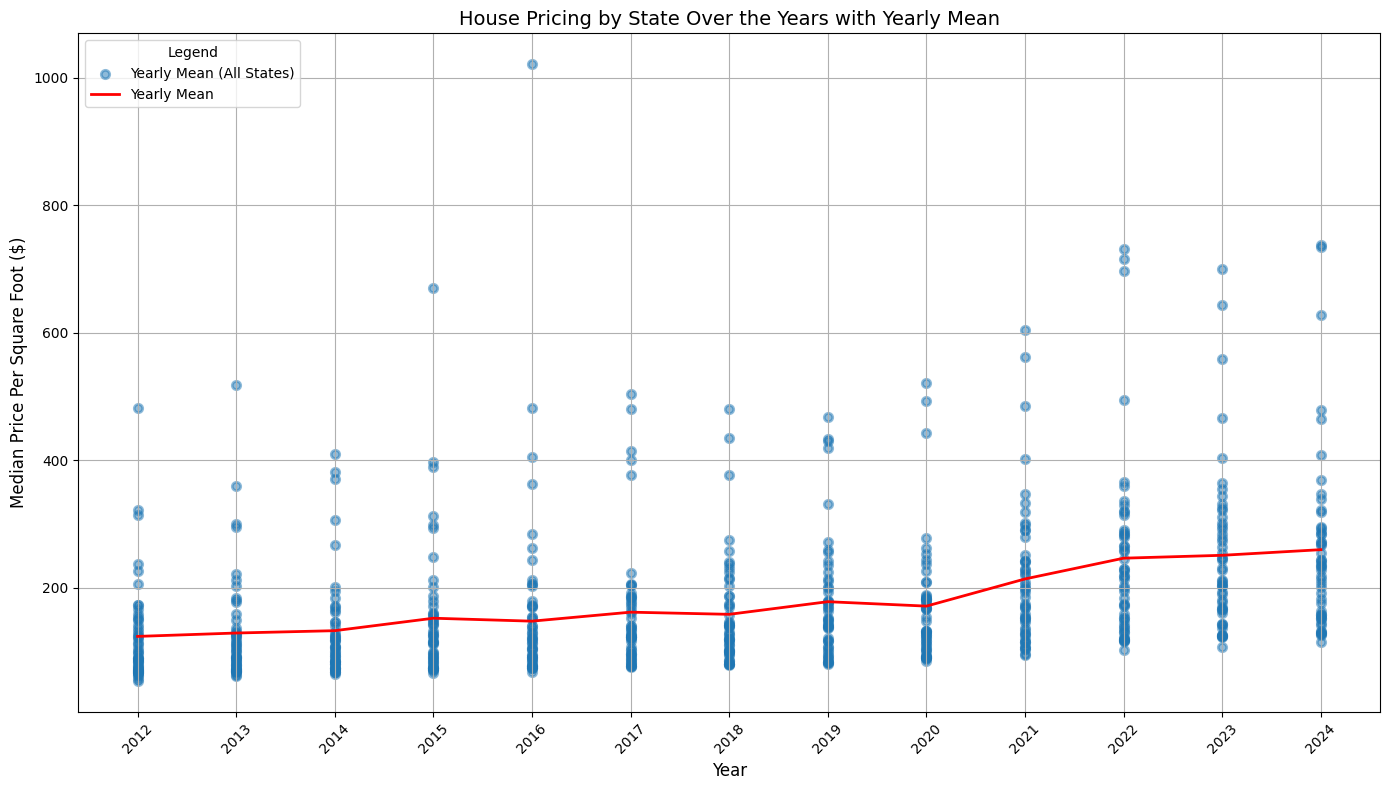

In [29]:
# Step 1: Extract year from the 'period_begin' column
housePricing['year'] = pd.to_datetime(housePricing['period_begin']).dt.year

# Step 2: Calculate the mean 'median_ppsf' for each year
state_yearly_means = housePricing.groupby(['year', 'state'])['median_ppsf'].mean().reset_index()

yearly_mean_ppsf = filtered_data.groupby('year')['median_ppsf'].mean().reset_index()

# Step 3: Create the scatter plot for each state's data
plt.figure(figsize=(14, 8))

# Step 4: Overlay the line plot of yearly mean prices
plt.scatter(
    state_yearly_means['year'],
    state_yearly_means['median_ppsf'],
    label='Yearly Mean (All States)',
    alpha = 0.5,
    linewidth=2
)

plt.plot(
    yearly_mean_ppsf['year'],
    yearly_mean_ppsf['median_ppsf'],
    color='red',
    linewidth=2,
    label='Yearly Mean'
)

# Customize the plot
plt.title('House Pricing by State Over the Years with Yearly Mean', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price Per Square Foot ($)', fontsize=12)
plt.grid(True)
plt.legend(title='Legend', fontsize=10, loc='upper left')
plt.xticks(sorted(housePricing['year'].unique()), rotation=45)
plt.tight_layout()
plt.show()

##### Outlier makes a graph look bad. So just exclude the outlier. But before doing this, let's check the outlier value.

In [25]:
state_yearly_means[state_yearly_means['year'] == 2016]

,year,state,median_ppsf
204,2016,Alabama,77.850188
205,2016,Alaska,135.967253
206,2016,Arizona,121.792198
207,2016,Arkansas,74.688915
208,2016,California,362.333980
209,2016,Colorado,283.953718
210,2016,Columbia,404.908799
211,2016,Connecticut,171.333878
212,2016,Delaware,1021.546573
213,2016,Florida,139.518362


##### Delaware... Not CA, not NY, not HI, not FL, not MA, it is delaware. It needs to explore. What happened in 2016 Delaware??? Is it wrongly collected? Or Is there some issue in Delaware? Whatever it is, let's exclude.

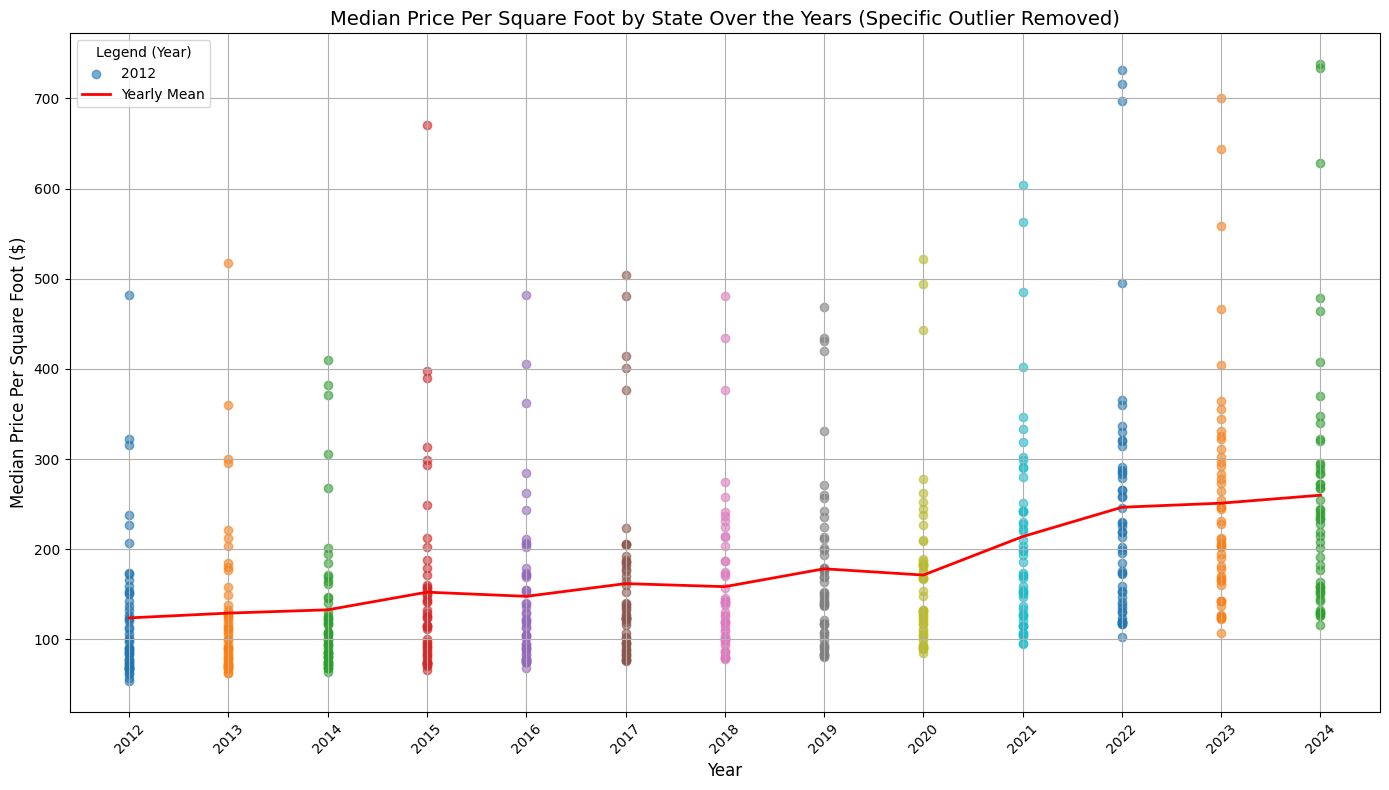

In [28]:
# Step 1: Remove the specific outlier (Delaware in 2016)
filtered_data = state_yearly_means[
    ~((state_yearly_means['state'] == 'Delaware') & (state_yearly_means['year'] == 2016))
]
yearly_mean_ppsf = filtered_data.groupby('year')['median_ppsf'].mean().reset_index()
# Step 2: Create the scatter plot for each state's data
plt.figure(figsize=(14, 8))
for year in sorted(filtered_data['year'].unique()):
    year_data = filtered_data[filtered_data['year'] == year]
    plt.scatter(
        [year] * len(year_data),  # x-coordinates (same year for all points)
        year_data['median_ppsf'],  # y-coordinates
        alpha=0.6,  # Transparency for overlapping points
        label=f"{year}" if year == sorted(filtered_data['year'].unique())[0] else None
    )
    
plt.plot(
    yearly_mean_ppsf['year'],
    yearly_mean_ppsf['median_ppsf'],
    color='red',
    linewidth=2,
    label='Yearly Mean'
)

plt.title('Median Price Per Square Foot by State Over the Years (Specific Outlier Removed)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price Per Square Foot ($)', fontsize=12)
plt.grid(True)
plt.xticks(sorted(filtered_data['year'].unique()), rotation=45)
plt.tight_layout()

# Optional: Show legend (only for the first year to reduce clutter)
plt.legend(title='Legend (Year)', loc='upper left', fontsize=10)
plt.show()

#### Does it look like centralized or dispersed?

In [33]:
# Before excluding the outlier
variance_state_year = state_yearly_means.groupby(['year'])['median_ppsf'].var()
variance_state_year

year
2012     6237.243119
2013     7229.412196
2014     6605.794889
2015    11645.340271
2016    22382.037751
2017    10177.879116
2018     7533.259596
2019     9092.312900
2020     8917.824256
2021    12816.589844
2022    20953.878328
2023    16284.823341
2024    19924.096378
Name: median_ppsf, dtype: float64

In [34]:
# After excluding
variance_state_year_wo = filtered_data.groupby(['year'])['median_ppsf'].var()
variance_state_year_wo

year
2012     6237.243119
2013     7229.412196
2014     6605.794889
2015    11645.340271
2016     7560.902870
2017    10177.879116
2018     7533.259596
2019     9092.312900
2020     8917.824256
2021    12816.589844
2022    20953.878328
2023    16284.823341
2024    19924.096378
Name: median_ppsf, dtype: float64

2016 data looks much better in filtered one. 

Hawaii:  
29.22 x - 5.843e+04
California:  
35.65 x - 7.15e+04
Wisconsin:  
8.984 x - 1.801e+04
All States:  
13.51 x - 2.708e+04


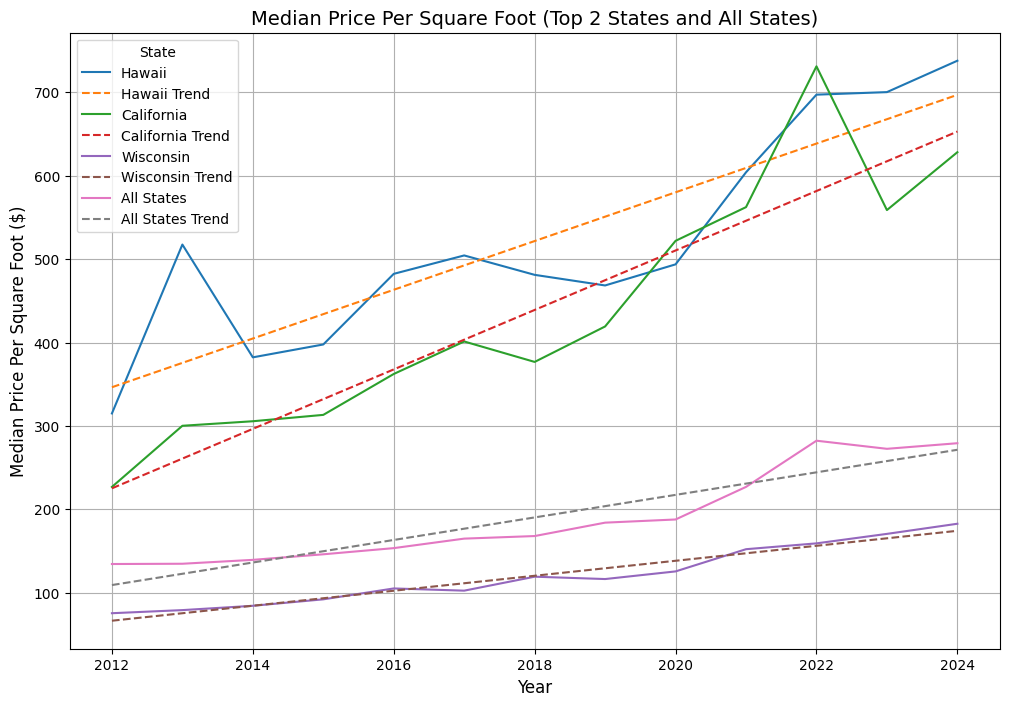

In [178]:
# Calculate mean 'median_ppsf' for each state and identify top 2 states
state_avg_ppsf = housePricing.groupby('state')['median_ppsf'].mean().sort_values(ascending=False)
selected_states = state_avg_ppsf.head(2).index.tolist()
selected_states.append('Wisconsin')
# Filter the data for the top 2 states
selected_states_data = housePricing[housePricing['state'].isin(selected_states)]

# Extract year from 'period_begin' and group by year and state
housePricing['year'] = pd.to_datetime(housePricing['period_begin']).dt.year
yearly_data = housePricing.groupby(['year', 'state'])['median_ppsf'].mean().reset_index()

# Calculate the overall mean 'median_ppsf' for all states per year
overall_mean = housePricing.groupby('year')['median_ppsf'].mean().reset_index()
overall_mean['state'] = 'All States'  # Add a label for the line

# Combine top states and overall mean for plotting
combined_data = pd.concat([yearly_data[yearly_data['state'].isin(selected_states)], overall_mean])

# Plot the line graph with trend lines
plt.figure(figsize=(12, 8))
for state in selected_states + ['All States']:
    state_data = combined_data[combined_data['state'] == state]
    plt.plot(state_data['year'], state_data['median_ppsf'], label=state)

    # Add a trend line
    z = np.polyfit(state_data['year'], state_data['median_ppsf'], 1)  # Linear fit
    p = np.poly1d(z)
    print(f'{state}: {p}')
    plt.plot(state_data['year'], p(state_data['year']), linestyle='--', label=f"{state} Trend")

# Customize the plot
plt.title('Median Price Per Square Foot (Top 2 States and All States)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price Per Square Foot ($)', fontsize=12)
plt.legend(title='State', fontsize=10, loc='upper left')
plt.grid(True)
plt.show()

In [72]:
z

array([ 8.98411348e+00, -1.80095426e+04])

All StatesTrend line:  
0.06902 x - 134.1
WisconsinTrend line:  
0.07511 x - 146.8


/var/folders/sh/cp3hzsyj6cx_zsl5rn3l6nhc0000gn/T/ipykernel_60317/4006387797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['log_med_ppsf'] = np.log(state_data['median_ppsf'])
/var/folders/sh/cp3hzsyj6cx_zsl5rn3l6nhc0000gn/T/ipykernel_60317/4006387797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['log_med_ppsf'] = np.log(state_data['median_ppsf'])


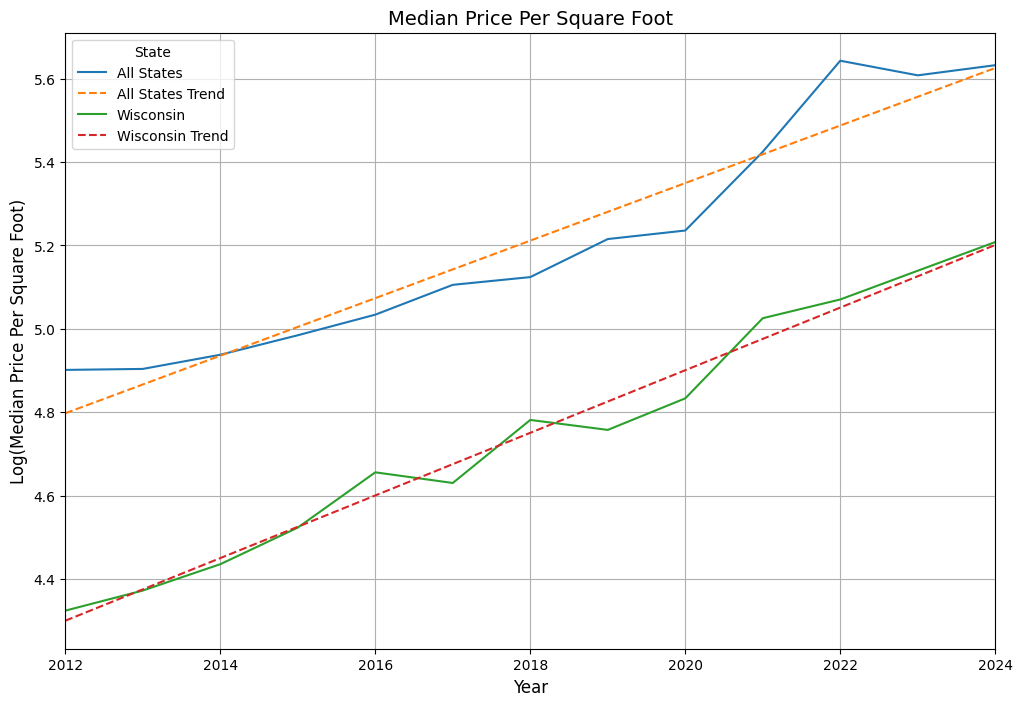

In [199]:
# Step 4: Plot the line graph with trend lines
plt.figure(figsize=(12, 8))
for state in ['All States', 'Wisconsin']:
    state_data = combined_data[combined_data['state'] == state]
    state_data['log_med_ppsf'] = np.log(state_data['median_ppsf'])
    plt.plot(state_data['year'], state_data['log_med_ppsf'], label=state)

    # Add a trend line
    z = np.polyfit(state_data['year'], state_data['log_med_ppsf'], 1)  # Linear fit
    p = np.poly1d(z)
    print(f'{state}Trend line: {p}')
    plt.plot(state_data['year'], p(state_data['year']), linestyle='--', label=f"{state} Trend")

# Customize the plot
plt.title('Median Price Per Square Foot', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Log(Median Price Per Square Foot)', fontsize=12)
plt.xlim((2012, 2024))
plt.legend(title='State', fontsize=10, loc='upper left')
plt.grid(True)
plt.show()

Noteworthy point if the trend from 2022-2023. It's right after the pandemic and the US value is decreasing while the WI value keeps increasing. 

In [50]:
rent = pd.read_csv('rent.csv')

In [51]:
rent

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,1219.505157,1226.110978,1235.157406,1244.364461,1253.736804,...,1944.107977,1953.303835,1965.220282,1976.936082,1988.630874,1999.099587,2007.481254,2011.654608,2012.727325,2009.011878
1,394913,1,"New York, NY",msa,NY,2309.053853,2323.945634,2342.172815,2362.866865,2378.708487,...,3174.657547,3193.191963,3224.492468,3253.440784,3287.035670,3315.485733,3333.168448,3338.425192,3327.404340,3312.654681
2,753899,2,"Los Angeles, CA",msa,CA,1824.564158,1837.131789,1852.995958,1866.544385,1880.965935,...,2871.259690,2884.646776,2901.529115,2911.722715,2926.292759,2939.666326,2953.144347,2959.110454,2963.153361,2960.439674
3,394463,3,"Chicago, IL",msa,IL,1376.890143,1383.676519,1393.215837,1402.069318,1412.366133,...,1917.995356,1933.028681,1947.243502,1967.196287,1985.349245,2002.663746,2011.593882,2014.948727,2013.286737,2012.134644
4,394514,4,"Dallas, TX",msa,TX,1102.520229,1107.580420,1115.085598,1127.112455,1136.976254,...,1741.246848,1738.896640,1743.615955,1748.528748,1756.554919,1762.601323,1768.678076,1771.439698,1767.837761,1760.888138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,395130,890,"Sterling, CO",msa,CO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1347.500000
643,394371,891,"Beatrice, NE",msa,NE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,925.000000
644,394718,892,"Jamestown, ND",msa,ND,NaN,NaN,NaN,NaN,NaN,...,1045.626317,1034.097298,1037.624419,1056.947346,1069.927885,1079.868304,1097.089454,1108.408851,1132.955276,1120.333333
645,394996,915,"Portales, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,967.156106,945.233816,956.733345,966.178250,984.192088,984.226060,987.743110,986.750513,989.110846,997.700397


In [52]:
rent['state'] = rent['RegionName'].str.split(',').str[1].str.strip()

In [77]:
MSN_rent = rent[rent['RegionName']=='Madison, WI']
MSN_rent

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,state
87,394816,88,"Madison, WI",msa,WI,1145.62392,1157.5907,1162.736723,1170.826342,1174.930531,...,1729.117254,1740.215753,1751.584966,1757.23371,1762.338988,1760.281865,1761.789072,1771.021458,1794.186187,WI


In [78]:
US_rent = rent[rent['RegionName'] == 'United States']

Madison:   
0.04387 x - 81.37
US:   
0.05333 x - 100.4


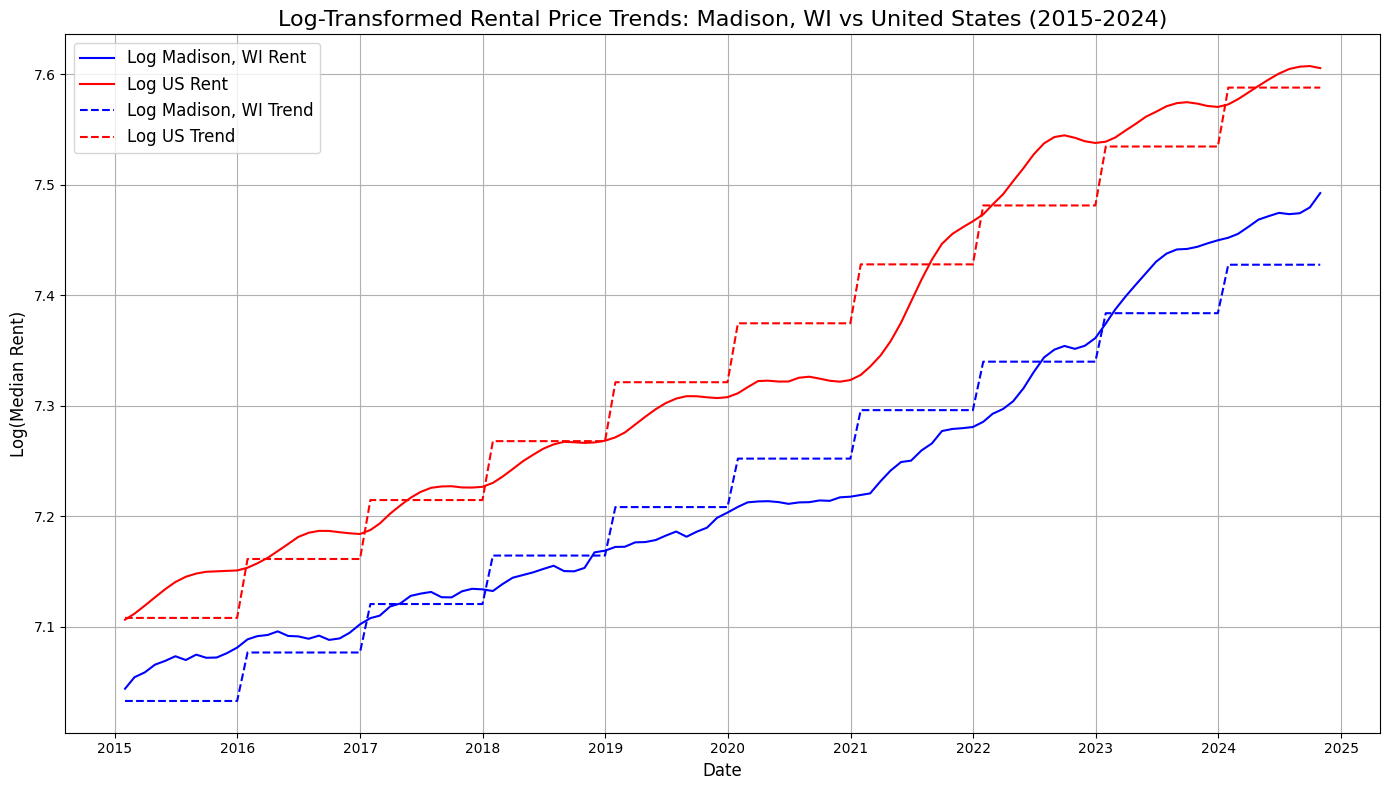

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Extract data for Madison, WI
MSN_rent = rent[rent['RegionName'] == 'Madison, WI']
MSN_rent = MSN_rent.iloc[:, 5:].T.reset_index()
MSN_rent.columns = ['Date', 'Madison_Rent']

# Extract data for United States
US_rent = rent[rent['RegionName'] == 'United States']
US_rent = US_rent.iloc[:, 5:].T.reset_index()
US_rent.columns = ['Date', 'US_Rent']

# Remove rows where the 'Date' column does not match the expected format
MSN_rent = MSN_rent[MSN_rent['Date'].str.match(r'\d{4}-\d{2}-\d{2}')]
US_rent = US_rent[US_rent['Date'].str.match(r'\d{4}-\d{2}-\d{2}')]

# Combine both datasets
combined_rent = MSN_rent.merge(US_rent, on='Date')

# Convert to numeric and datetime
combined_rent['Madison_Rent'] = pd.to_numeric(combined_rent['Madison_Rent'], errors='coerce')
combined_rent['US_Rent'] = pd.to_numeric(combined_rent['US_Rent'], errors='coerce')
combined_rent['Date'] = pd.to_datetime(combined_rent['Date'])

# Drop rows with NaN values in any column
combined_rent.dropna(subset=['Madison_Rent', 'US_Rent'], inplace=True)
combined_rent['Year'] = combined_rent['Date'].dt.year
# Convert dates to ordinal for regression
combined_rent['Date_Ordinal'] = combined_rent['Date'].apply(lambda x: x.toordinal())

# Apply logarithmic transformation to the rental values
combined_rent['Log_Madison_Rent'] = np.log(combined_rent['Madison_Rent'])
combined_rent['Log_US_Rent'] = np.log(combined_rent['US_Rent'])

# Fit linear regression for the logarithmic values
z_madison = np.polyfit(combined_rent['Year'], combined_rent['Log_Madison_Rent'], 1)
p_madison = np.poly1d(z_madison)
print("Madison: ", p_madison)
z_us = np.polyfit(combined_rent['Year'], combined_rent['Log_US_Rent'], 1)
p_us = np.poly1d(z_us)
print("US: ", p_us)
# Plot the trends with logarithmic values
plt.figure(figsize=(14, 8))
plt.plot(combined_rent['Date'], combined_rent['Log_Madison_Rent'], label='Log Madison, WI Rent', color='blue')
plt.plot(combined_rent['Date'], combined_rent['Log_US_Rent'], label='Log US Rent', color='red')

# Add trend lines
plt.plot(combined_rent['Date'], p_madison(combined_rent['Year']), linestyle='--', color='blue', label='Log Madison, WI Trend')
plt.plot(combined_rent['Date'], p_us(combined_rent['Year']), linestyle='--', color='red', label='Log US Trend')

# Customize the plot
plt.title('Log-Transformed Rental Price Trends: Madison, WI vs United States (2015-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log(Median Rent)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


In [188]:
combined_rent['Date'].dt.year

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
113    2024
114    2024
115    2024
116    2024
117    2024
Name: Date, Length: 118, dtype: int32

In [180]:
US_rent

,Date,US_Rent
0,2015-01-31,1219.505157
1,2015-02-28,1226.110978
2,2015-03-31,1235.157406
3,2015-04-30,1244.364461
4,2015-05-31,1253.736804
...,...,...
113,2024-06-30,1999.099587
114,2024-07-31,2007.481254
115,2024-08-31,2011.654608
116,2024-09-30,2012.727325


In [181]:
two_rent = pd.merge(MSN_rent, US_rent[['Date', 'US_Rent']], on = 'Date', how = 'inner') 

In [183]:
two_rent.to_csv('US_WI_Rent.csv')

In [169]:
yearly_mean = pd.DataFrame(state_yearly_means.groupby('year')['median_ppsf'].mean())

In [172]:
yearly_mean
yearly_mean.reset_index(inplace=True)
# yearly_mean.rename(columns={'index': 'Year'}, inplace=True)
yearly_mean.rename(columns={'year': 'Year'}, inplace=True)

In [173]:
yearly_mean.columns

Index(['index', 'Year', 'median_ppsf'], dtype='object')

In [174]:
yearly_mean

,index,Year,median_ppsf
0,0,2012,123.802764
1,1,2013,129.104729
2,2,2014,132.775822
3,3,2015,152.332797
4,4,2016,164.844250
5,5,2017,161.822510
6,6,2018,158.439615
7,7,2019,178.253909
8,8,2020,171.316326
9,9,2021,213.957101


In [175]:
merged_data = pd.merge(yearly_mean, filtered_US[['Year', 'Mean Income']], on='Year', how='inner')

In [220]:
median_sale

,Year,median_sale_price
0,2012,209043.601501
1,2013,221865.187334
2,2014,232071.045593
3,2015,245241.005918
4,2016,257339.419292
5,2017,271840.620202
6,2018,288505.489624
7,2019,298204.742148
8,2020,325682.007599
9,2021,377679.332537


In [221]:
merged_data = pd.merge(merged_data, median_sale[['Year', 'median_sale_price']], on = 'Year', how='inner')

In [254]:
two_rent['Date'] = pd.to_datetime(two_rent['Date'])

In [255]:
two_rent['Year'] = two_rent['Date'].dt.year

In [256]:
two_rent

,Date,Madison_Rent,US_Rent,Year
0,2015-01-31,1145.62392,1219.505157,2015
1,2015-02-28,1157.5907,1226.110978,2015
2,2015-03-31,1162.736723,1235.157406,2015
3,2015-04-30,1170.826342,1244.364461,2015
4,2015-05-31,1174.930531,1253.736804,2015
...,...,...,...,...
113,2024-06-30,1762.338988,1999.099587,2024
114,2024-07-31,1760.281865,2007.481254,2024
115,2024-08-31,1761.789072,2011.654608,2024
116,2024-09-30,1771.021458,2012.727325,2024


In [257]:
sum_two_rent = pd.DataFrame(two_rent.groupby('Year')['US_Rent'].mean())

In [258]:
sum_two_rent.reset_index(inplace = True)
sum_two_rent.rename(columns={'index': 'Year'}, inplace=True)


In [259]:
sum_two_rent

,Year,US_Rent
0,2015,1256.43298
1,2016,1307.341494
2,2017,1360.741235
3,2018,1416.905476
4,2019,1475.923886
5,2020,1512.573195
6,2021,1639.547026
7,2022,1844.462871
8,2023,1924.232323
9,2024,1986.81737


In [260]:
merged_data = pd.merge(merged_data, sum_two_rent[['Year', 'US_Rent']], on = 'Year', how = 'inner')

In [233]:
# Apply log transformation to house pricing and income
merged_data['Log_house_pricing'] = np.log(merged_data['median_sale_price'])
merged_data['Log_Income'] = np.log(merged_data['Mean Income'])

# Run a log-log regression model
import statsmodels.api as sm

# Define the dependent and independent variables
X = sm.add_constant(merged_data['Log_Income'])  # Add a constant for the intercept
y = merged_data['Log_house_pricing']

# Fit the regression model
log_log_model = sm.OLS(y, X).fit()

# Print the regression results
print(log_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Log_house_pricing   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     217.4
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           4.13e-08
Time:                        11:07:12   Log-Likelihood:                 19.182
No. Observations:                  12   AIC:                            -34.36
Df Residuals:                      10   BIC:                            -33.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6521      1.237     -4.571      0.0

/Users/sodamna/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [232]:
# Apply log transformation to house pricing and income
merged_data['Log_med_ppsf'] = np.log(merged_data['median_ppsf'])
merged_data['Log_Income'] = np.log(merged_data['Mean Income'])

# Run a log-log regression model
import statsmodels.api as sm

# Define the dependent and independent variables
X = sm.add_constant(merged_data['Log_Income'])  # Add a constant for the intercept
y = merged_data['Log_med_ppsf']

# Fit the regression model
log_log_model = sm.OLS(y, X).fit()

# Print the regression results
print(log_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Log_med_ppsf   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     112.8
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           9.11e-07
Time:                        11:07:04   Log-Likelihood:                 15.970
No. Observations:                  12   AIC:                            -27.94
Df Residuals:                      10   BIC:                            -26.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.0353      1.616     -7.447      0.0

/Users/sodamna/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


Trend:  
0.004384 x - 104.3


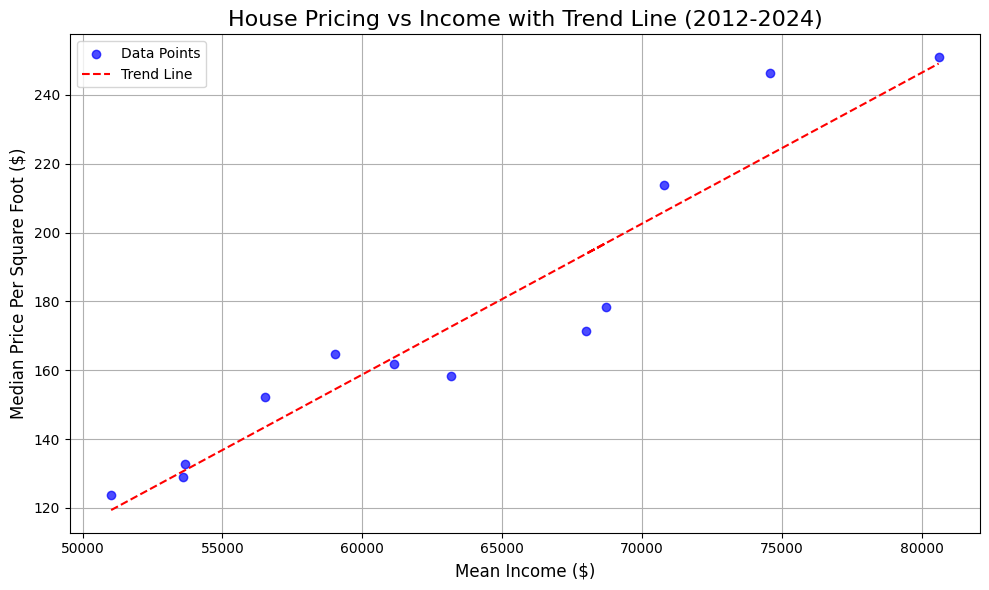

In [203]:
# Fit a linear regression for the trend line
z = np.polyfit(merged_data['Mean Income'], merged_data['median_ppsf'], 1)  # Linear fit
p = np.poly1d(z)  # Create polynomial function for the trend line
print('Trend:', p)
# Plot the relationship with trend line
plt.figure(figsize=(10, 6))

# Scatter plot: Income vs House Pricing
plt.scatter(merged_data['Mean Income'], merged_data['median_ppsf'], color='blue', alpha=0.7, label='Data Points')

# Add trend line
plt.plot(
    merged_data['Mean Income'],
    p(merged_data['Mean Income']),
    color='red',
    linestyle='--',
    label='Trend Line'
)

# Add labels and title
plt.title('House Pricing vs Income with Trend Line (2012-2024)', fontsize=16)
plt.xlabel('Mean Income ($)', fontsize=12)
plt.ylabel('Median Price Per Square Foot ($)', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


log-log:   
0.004384 x - 104.3


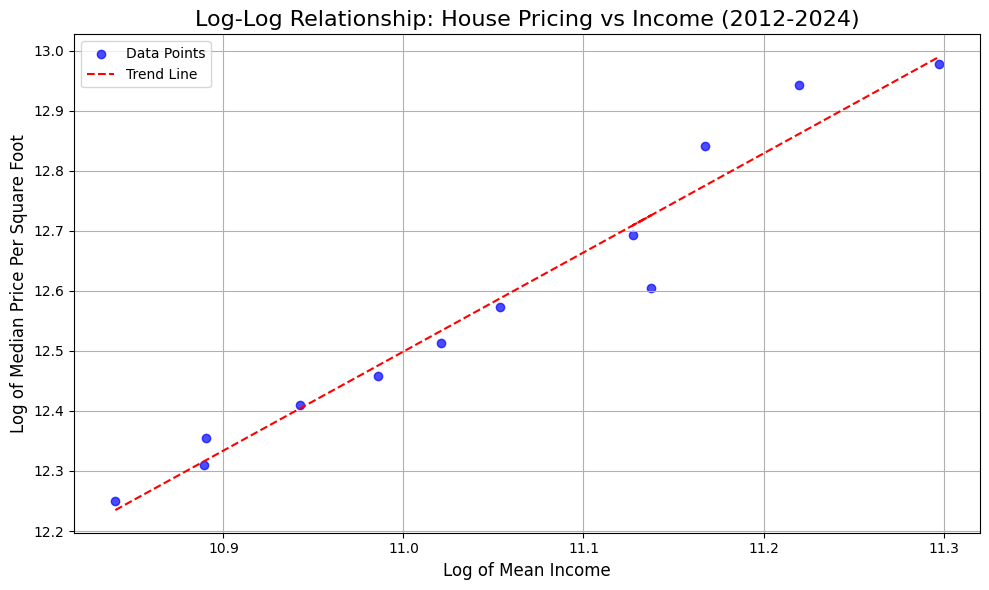

In [235]:
# Apply log transformation to income and house pricing
merged_data['Log_Mean_Income'] = np.log(merged_data['Mean Income'])
merged_data['Log_House_Price'] = np.log(merged_data['median_sale_price'])

# Fit a linear regression for the trend line in log-log space
z_log = np.polyfit(merged_data['Log_Mean_Income'], merged_data['Log_House_Price'], 1)  # Linear fit
p_log = np.poly1d(z_log)  # Create polynomial function for the trend line
print('log-log: ', p)
# Plot the log-log relationship with trend line
plt.figure(figsize=(10, 6))

# Scatter plot: Log Income vs Log House Pricing
plt.scatter(
    merged_data['Log_Mean_Income'],
    merged_data['Log_House_Price'],
    color='blue',
    alpha=0.7,
    label='Data Points'
)

# Add trend line
plt.plot(
    merged_data['Log_Mean_Income'],
    p_log(merged_data['Log_Mean_Income']),
    color='red',
    linestyle='--',
    label='Trend Line'
)

# Add labels and title
plt.title('Log-Log Relationship: House Pricing vs Income (2012-2024)', fontsize=16)
plt.xlabel('Log of Mean Income', fontsize=12)
plt.ylabel('Log of Median Price Per Square Foot', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [243]:
# Calculate the house price-to-income ratio
merged_data['Price_to_Income_Ratio'] = merged_data['median_sale_price'] / merged_data['Mean Income']

# Display the first few rows with the new ratio column
print(merged_data[['Year', 'median_sale_price', 'Mean Income', 'Price_to_Income_Ratio']].head())


   Year  median_sale_price  Mean Income  Price_to_Income_Ratio
0  2012      209043.601501      51020.0               4.097287
1  2013      221865.187334      53590.0               4.140048
2  2014      232071.045593      53660.0               4.324842
3  2015      245241.005918      56520.0               4.339013
4  2016      257339.419292      59040.0               4.358730


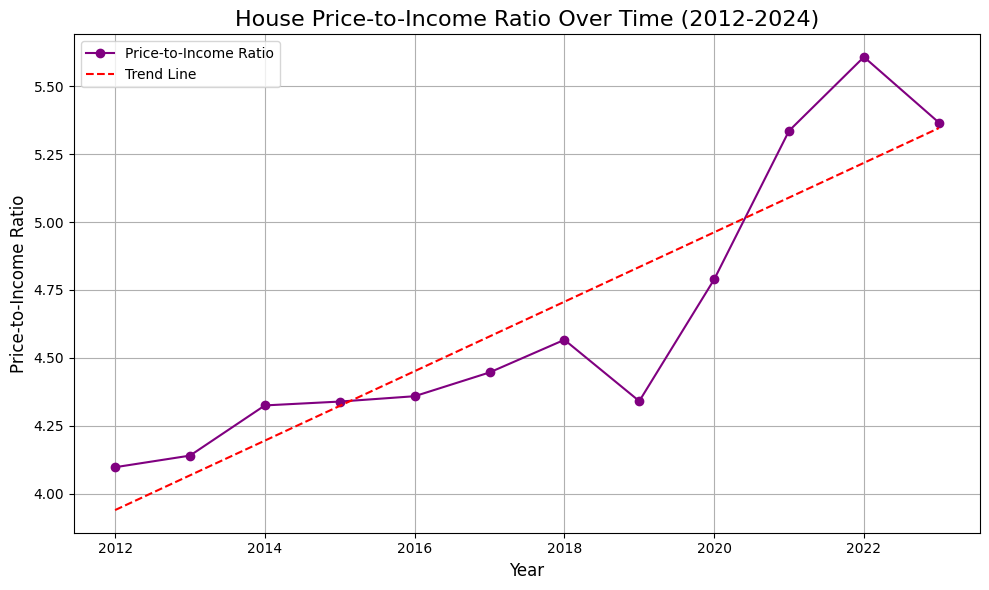

AttributeError: module 'statsmodels.stats.api' has no attribute 'norm'

In [238]:
import statsmodels.api as sm
from scipy.stats import norm
# Fit a linear regression for the trend line of price-to-income ratio
z_ratio = np.polyfit(merged_data['Year'], merged_data['Price_to_Income_Ratio'], 1)  # Linear fit
p_ratio = np.poly1d(z_ratio)  # Create polynomial function for the trend line

# Plot the price-to-income ratio over time with the trend line
plt.figure(figsize=(10, 6))
plt.plot(
    merged_data['Year'], 
    merged_data['Price_to_Income_Ratio'], 
    label='Price-to-Income Ratio', 
    color='purple', 
    marker='o'
)
plt.plot(
    merged_data['Year'], 
    p_ratio(merged_data['Year']), 
    linestyle='--', 
    color='red', 
    label='Trend Line'
)

# Customize the plot
plt.title('House Price-to-Income Ratio Over Time (2012-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price-to-Income Ratio', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Hypothesis Test
# Null Hypothesis H0: Beta1 = 2.6
# Alternative Hypothesis Ha: Beta1 != 2.6

# Prepare data for regression
X = sm.add_constant(merged_data['Year'])  # Add a constant for the intercept
y = merged_data['Price_to_Income_Ratio']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Retrieve the slope coefficient (Beta1) and its standard error
beta1 = model.params['Year']
se_beta1 = model.bse['Year']

# Perform the t-test
beta1_null = 2.6  # Hypothesized value
t_stat = (beta1 - beta1_null) / se_beta1
p_value = 2 * (1 - sm.stats.norm.cdf(abs(t_stat)))  # Two-tailed test

# Print results
print(f"Estimated Beta1: {beta1:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis (H0: Beta1 = 2.6)")
else:
    print("Fail to reject the null hypothesis (H0: Beta1 = 2.6)")


In [247]:
from scipy.stats import norm

# Hypothesis Test
# Null Hypothesis H0: Beta1 > 2.6
# Alternative Hypothesis Ha: Beta1 <= 2.6

# Prepare data for regression
X = sm.add_constant(merged_data['Mean Income'])  # Add a constant for the intercept
y = merged_data['median_sale_price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Retrieve the slope coefficient (Beta1) and its standard error
beta1 = model.params['Mean Income']
se_beta1 = model.bse['Mean Income']
# Perform the t-test
beta1_null = 2.6  # Hypothesized value
t_stat = (beta1 - beta1_null) / se_beta1

# Calculate the one-tailed p-value
p_value = norm.cdf(t_stat)  # Since we are testing Beta1 > 2.6

# Print results
print(f"Estimated Beta1: {beta1:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis (H0: Beta1 > 2.6)")
else:
    print("Fail to reject the null hypothesis (H0: Beta1 > 2.6)")


Estimated Beta1: 7.9386
T-statistic: 8.5605
P-value: 1.0000
Fail to reject the null hypothesis (H0: Beta1 > 2.6)


In [249]:
from scipy.stats import norm

# Hypothesis Test
# Null Hypothesis H0: Beta1 = 2.6
# Alternative Hypothesis Ha: Beta1 > 2.6

# Prepare data for regression
X = sm.add_constant(merged_data['Mean Income'])  # Add a constant for the intercept
y = merged_data['median_sale_price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Retrieve the slope coefficient (Beta1) and its standard error
beta1 = model.params['Mean Income']
se_beta1 = model.bse['Mean Income']

# Perform the t-test
beta1_null = 2.6  # Hypothesized value
t_stat = (beta1 - beta1_null) / se_beta1

# Calculate the one-tailed p-value
p_value = 1 - norm.cdf(t_stat)  # One-tailed test for Beta1 > 2.6

# Print results
print(f"Estimated Beta1: {beta1:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis (H0: Beta1 = 2.6, one-tailed test: Beta1 > 2.6)")
else:
    print("Fail to reject the null hypothesis (H0: Beta1 = 2.6, one-tailed test: Beta1 > 2.6)")
    
print(model.summary())


Estimated Beta1: 7.9386
T-statistic: 8.5605
P-value: 0.0000
Reject the null hypothesis (H0: Beta1 = 2.6, one-tailed test: Beta1 > 2.6)
                            OLS Regression Results                            
Dep. Variable:      median_sale_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     162.0
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           1.67e-07
Time:                        12:38:25   Log-Likelihood:                -134.24
No. Observations:                  12   AIC:                             272.5
Df Residuals:                      10   BIC:                             273.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.

/Users/sodamna/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
X = sm.add_constant(merged_data[''])  # Add a constant for the intercept
y = merged_data['US_Rent']

# Fit the regression model
model = sm.OLS(y, X).fit()

In [262]:
housePricing

,Unnamed: 0,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,...,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,year
0,0,2015-09-01,2015-09-30,30,place,6,7874,f,"Golf Manor, OH",Golf Manor,...,0.230769,0.030769,NaN,0.166667,0.166667,0.166667,"Cincinnati, OH",17140,2024-10-16 14:24:52,2015
1,1,2022-09-01,2022-09-30,30,place,6,13198,f,"Okeechobee, FL",Okeechobee,...,0.268293,-0.017422,0.062410,0.000000,-0.166667,-0.375000,"Okeechobee, FL",36380,2024-10-16 14:24:52,2022
2,2,2016-06-01,2016-06-30,30,place,6,36710,f,"Amherst Town, MA",Amherst Town,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Springfield, MA",44140,2024-10-16 14:24:52,2016
3,3,2023-05-01,2023-05-31,30,place,6,29751,f,"Stow, MA",Stow,...,0.214286,0.014286,0.071429,0.636364,0.064935,-0.063636,"Boston, MA",14454,2024-10-16 14:24:52,2023
4,4,2021-02-01,2021-02-28,30,place,6,23772,f,"Kearns, UT",Kearns,...,NaN,NaN,NaN,0.000000,NaN,NaN,"Salt Lake City, UT",41620,2024-10-16 14:24:52,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591133,5591133,2021-10-01,2021-10-31,30,place,6,1876,f,"Bismarck, ND",Bismarck,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Bismarck, ND",13900,2024-10-16 14:24:52,2021
5591134,5591134,2012-09-01,2012-09-30,30,place,6,21296,f,"August, CA",August,...,0.111111,0.039683,-0.038889,0.400000,-0.044444,0.100000,"Stockton, CA",44700,2024-10-16 14:24:52,2012
5591135,5591135,2019-04-01,2019-04-30,30,place,6,15892,f,"Richland Hills, TX",Richland Hills,...,0.350000,-0.094444,0.173529,0.750000,0.250000,0.102941,"Fort Worth, TX",23104,2024-10-16 14:24:52,2019
5591136,5591136,2017-11-01,2017-11-30,30,place,6,9295,f,"Kearny, NJ",Kearny,...,0.200000,NaN,-0.466667,NaN,NaN,NaN,"New York, NY",35614,2024-10-16 14:24:52,2017


In [263]:
rent

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,state
0,102001,0,United States,country,NaN,1219.505157,1226.110978,1235.157406,1244.364461,1253.736804,...,1953.303835,1965.220282,1976.936082,1988.630874,1999.099587,2007.481254,2011.654608,2012.727325,2009.011878,US
1,394913,1,"New York, NY",msa,NY,2309.053853,2323.945634,2342.172815,2362.866865,2378.708487,...,3193.191963,3224.492468,3253.440784,3287.035670,3315.485733,3333.168448,3338.425192,3327.404340,3312.654681,NY
2,753899,2,"Los Angeles, CA",msa,CA,1824.564158,1837.131789,1852.995958,1866.544385,1880.965935,...,2884.646776,2901.529115,2911.722715,2926.292759,2939.666326,2953.144347,2959.110454,2963.153361,2960.439674,CA
3,394463,3,"Chicago, IL",msa,IL,1376.890143,1383.676519,1393.215837,1402.069318,1412.366133,...,1933.028681,1947.243502,1967.196287,1985.349245,2002.663746,2011.593882,2014.948727,2013.286737,2012.134644,IL
4,394514,4,"Dallas, TX",msa,TX,1102.520229,1107.580420,1115.085598,1127.112455,1136.976254,...,1738.896640,1743.615955,1748.528748,1756.554919,1762.601323,1768.678076,1771.439698,1767.837761,1760.888138,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,395130,890,"Sterling, CO",msa,CO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1347.500000,CO
643,394371,891,"Beatrice, NE",msa,NE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,925.000000,NE
644,394718,892,"Jamestown, ND",msa,ND,NaN,NaN,NaN,NaN,NaN,...,1034.097298,1037.624419,1056.947346,1069.927885,1079.868304,1097.089454,1108.408851,1132.955276,1120.333333,ND
645,394996,915,"Portales, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,945.233816,956.733345,966.178250,984.192088,984.226060,987.743110,986.750513,989.110846,997.700397,NM
